<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Feedforward_Artificial_Neural_Network/ANN_For_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print('X_train.shape:', X_train.shape)

X_train.shape: (60000, 28, 28)


In [6]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')

])

In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.9116 - val_loss: 0.1369 - val_accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9577 - val_loss: 0.1036 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9673 - val_loss: 0.0798 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0785 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9790 - val_loss: 0.0724 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0775 - val_accuracy:

In [9]:
r

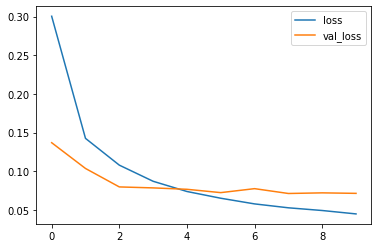

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

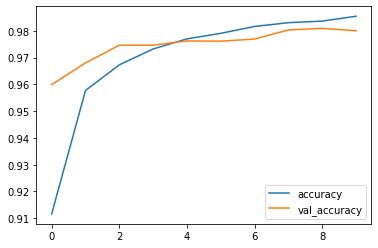

In [11]:

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [12]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9800
[0.07142984122037888, 0.9800000190734863]


Confusion matrix, wihtout normalization
[[ 971    0    0    2    1    2    1    1    2    0]
 [   0 1122    2    3    0    0    2    0    6    0]
 [   7    0  999    8    3    0    2    6    7    0]
 [   1    0    0 1000    0    2    0    4    2    1]
 [   1    0    1    0  974    0    5    0    0    1]
 [   3    0    0   12    2  864    3    1    6    1]
 [   3    3    0    1    4    4  939    1    3    0]
 [   1    6    5    2    1    0    0 1008    2    3]
 [   0    1    2    7    3    3    1    4  951    2]
 [   3    4    0    9   11    1    0    8    1  972]]


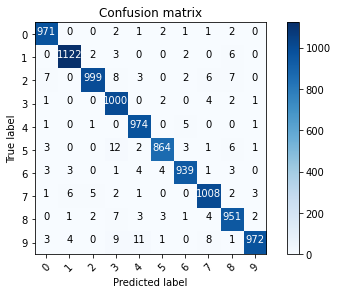

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matirx(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, wihtout normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matirx(cm, list(range(10)))











Text(0.5, 1.0, 'True label: 6 predicted: 5')

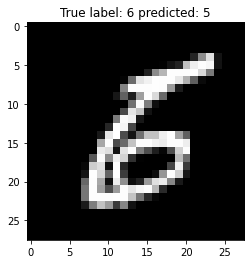

In [21]:
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s predicted: %s' %(y_test[i], p_test[i]))